<a href="https://colab.research.google.com/github/Tharunvikas55/ML/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def initalize_centroid(X,k):
  indices=np.random.choice(len(X),k,replace=False)
  return X[indices]

In [4]:
def assign_to_clusters(X,centroids):
   distances =np.linalg.norm(X[:,np.newaxis]-centroids,axis=2)
   return np.argmin(distances,axis=1)

In [5]:
def update_centroids(X,labels,k):
  centroids =np.array([X[labels==i].mean(axis=0) for i in range(k)])
  return centroids

In [6]:
def k_means(X,k,max_iters=100):
   centroids = initalize_centroid(X,k)
   for _ in range(max_iters):
    labels =assign_to_clusters(X,centroids)
    new_centroids=update_centroids(X,labels,k)
    if np.all(centroids==new_centroids):
      break
    centroids = new_centroids
   return labels,centroids


In [7]:
np.random.seed(42)
X= np.concatenate([np.random.normal(loc=i,scale=1,size=(50,2)) for i in range(5)])

In [8]:
X

array([[ 4.96714153e-01, -1.38264301e-01],
       [ 6.47688538e-01,  1.52302986e+00],
       [-2.34153375e-01, -2.34136957e-01],
       [ 1.57921282e+00,  7.67434729e-01],
       [-4.69474386e-01,  5.42560044e-01],
       [-4.63417693e-01, -4.65729754e-01],
       [ 2.41962272e-01, -1.91328024e+00],
       [-1.72491783e+00, -5.62287529e-01],
       [-1.01283112e+00,  3.14247333e-01],
       [-9.08024076e-01, -1.41230370e+00],
       [ 1.46564877e+00, -2.25776300e-01],
       [ 6.75282047e-02, -1.42474819e+00],
       [-5.44382725e-01,  1.10922590e-01],
       [-1.15099358e+00,  3.75698018e-01],
       [-6.00638690e-01, -2.91693750e-01],
       [-6.01706612e-01,  1.85227818e+00],
       [-1.34972247e-02, -1.05771093e+00],
       [ 8.22544912e-01, -1.22084365e+00],
       [ 2.08863595e-01, -1.95967012e+00],
       [-1.32818605e+00,  1.96861236e-01],
       [ 7.38466580e-01,  1.71368281e-01],
       [-1.15648282e-01, -3.01103696e-01],
       [-1.47852199e+00, -7.19844208e-01],
       [-4.

In [9]:
k=5
labels,centroids=k_means(X,k)

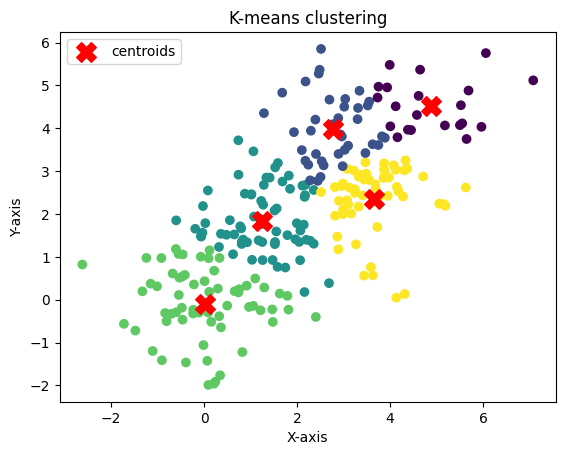

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red',label='centroids')
plt.title('K-means clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()  # Add a legend if needed
plt.show()

Mall_customer dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
df =pd.read_csv("https://raw.githubusercontent.com/ezioauditore-tech/AI/main/datasets/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
X=df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [16]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

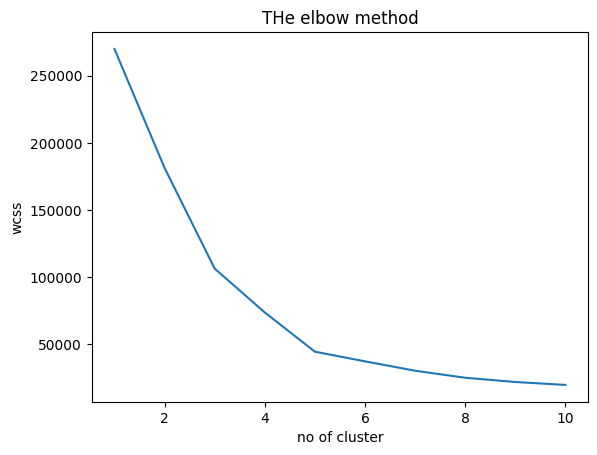

In [17]:
plt.plot(range(1,11),wcss)
plt.title('THe elbow method')
plt.xlabel('no of cluster')
plt.ylabel('wcss')
plt.show()

In [17]:
kmeansmodel =KMeans(n_clusters=5,init ='k-means++',random_state=0)
y_kmeans =kmeansmodel.fit_predict(X)